In [1]:
import addfips
import requests
import matplotlib.pyplot as plt
from IPython.display import Image
import folium
import pickle
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import pyproj
import collections
import numpy as np

%matplotlib inline

In [2]:
ws = pd.read_csv('../data/watershedbreakout.csv')

In [3]:
ws_geo = gpd.read_file('../data/8_dig_huc/wbdhu8_a_tn.shp')

In [4]:
ws['zero'] = 0

In [5]:
ws['Huc_8'] = ws['zero'].astype(str) + ws['Huc_8'].astype(str)

In [6]:
ws_geo = pd.merge(left = ws_geo, right = ws, left_on = 'HUC_8', right_on = 'Huc_8')

In [8]:
ws_geo

,REGION_x,SUBREGION_x,BASIN_x,SUBBASIN_x,HUC_2,HUC_4,HUC_6,HUC_8,ACRES,SQ_MILES,...,C_Non_Vasc_Plant,C_Amphibian,C_Bird,C_Insect,C_Mammal,C_Fish,C_Mollusc,C_Flowering Plant,geometry_y,zero
0,Lower Mississippi Region,Lower Mississippi-Hatchie,Hatchie-Obion,Obion,08,0801,080102,08010202,841854.0,1315.0,...,0,0,9,0,7,14,4,27,"POLYGON ((375558.7161785973 254946.0951073859,...",0
1,Lower Mississippi Region,Lower Mississippi-Hatchie,Hatchie-Obion,South Fork Obion,08,0801,080102,08010203,740948.0,1158.0,...,0,0,5,0,4,15,0,12,"POLYGON ((345917.8274120154 229854.9848880805,...",0
2,Lower Mississippi Region,Lower Mississippi-Hatchie,Hatchie-Obion,North Fork Forked Deer,08,0801,080102,08010204,610687.0,954.0,...,0,0,7,0,1,2,0,6,"POLYGON ((295445.2382935372 206787.4342538007,...",0
3,Lower Mississippi Region,Lower Mississippi-Hatchie,Hatchie-Obion,South Fork Forked Deer,08,0801,080102,08010205,679073.0,1061.0,...,0,0,3,0,1,10,0,12,"POLYGON ((292003.1977778635 191223.7892955188,...",0
4,Lower Mississippi Region,Lower Mississippi-Hatchie,Hatchie-Obion,Forked Deer,08,0801,080102,08010206,45565.0,71.0,...,0,0,0,0,0,1,0,0,"POLYGON ((288930.1633623281 198879.6864498388,...",0
5,Lower Mississippi Region,Lower Mississippi-Hatchie,Hatchie-Obion,Upper Hatchie,08,0801,080102,08010207,733385.0,1146.0,...,0,0,3,1,1,7,1,21,"POLYGON ((356434.2550926422 113207.4920887724,...",0
6,Lower Mississippi Region,Lower Mississippi-Hatchie,Hatchie-Obion,Lower Hatchie,08,0801,080102,08010208,936811.0,1464.0,...,0,7,10,1,5,33,13,17,"POLYGON ((285546.2365789058 169865.9438606352,...",0
7,Lower Mississippi Region,Lower Mississippi-Hatchie,Hatchie-Obion,Loosahatchie,08,0801,080102,08010209,474787.0,742.0,...,0,2,3,0,2,1,0,9,"POLYGON ((271053.2133795345 138516.0714545753,...",0
8,South Atlantic-Gulf Region,Alabama,Coosa-Tallapoosa,Conasauga,03,0315,031501,03150101,465288.0,727.0,...,0,0,0,3,1,49,36,21,"POLYGON ((706220.9154863647 91210.62998303771,...",0
9,Ohio Region,Green,Green,Barren,05,0511,051100,05110002,1449593.0,2265.0,...,0,0,1,1,3,34,1,1,"POLYGON ((542394.3291816403 316255.1455274764,...",0


In [9]:
ws_geo['geometry'] = ws_geo['geometry_y']

C:\Users\zzach\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:852: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


GRank 1

AttributeError: 'Series' object has no attribute 'geom_type'

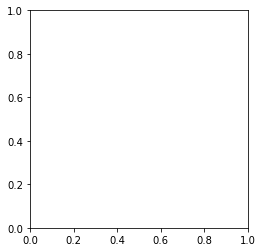

In [10]:
fig, ax = plt.subplots(figsize=(16,4))
ws_geo.plot(column = 'G5',
               cmap = 'Greens',
               edgecolor = 'grey',
                legend = True,
              ax = ax)
plt.title('Density of G1 Species Observations', fontsize = 16)
ax.axis('off');